### Plot train history

In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import os
import sys
import pickle
import torch
import pandas as pd
import numpy as np

ROOT_DIR = os.path.dirname(os.getcwd())
sys.path.append(ROOT_DIR)

from src.path import OUT_DIR, DATA_CLEAN, parquet_name
from src.plot_utils import plot_result, plot_training
from models.WaveNet import WaveNetClassifier

In [4]:
filename = "log-150chan-900epoch-01062022.pickle"
with open(os.path.join(OUT_DIR, filename),'rb') as file:
       history = pickle.load(file)

In [17]:
print(max(history["test_f1"]), history["test_f1"].index(max(history["test_f1"])))
index =  history["test_f1"].index(max(history["test_f1"]))
threshold  = history["test_threshold"][index]
threshold

0.842755064135673 529


0.0021576923076923097

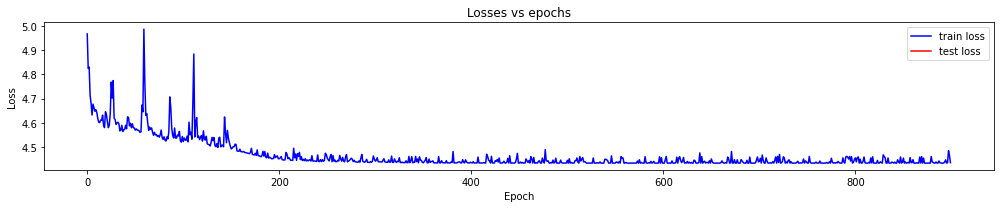

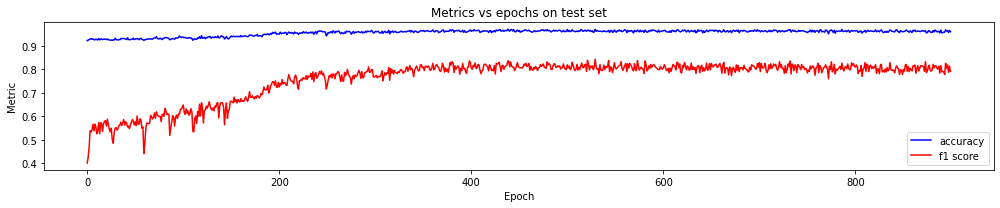

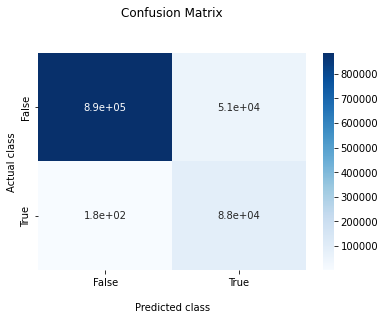

In [13]:
plot_training(history, True)

In [51]:
torch.manual_seed(0) 
shot = 82005
#shot = 82637
data = pd.read_parquet(os.path.join(DATA_CLEAN, parquet_name(shot, clean=True)))
print(data.shape[0])
model = WaveNetClassifier(150, 3, 4, 6, data.shape[0], 1, 0)
model_name = "bestwavenet-150chan-900epoch-01062022.pt"
if torch.cuda.is_available():
    device = torch.device("cuda")
    model.load_state_dict(torch.load(os.path.join(OUT_DIR, model_name)))
else:
    device = torch.device("cpu")
    model.load_state_dict(torch.load(os.path.join(OUT_DIR, model_name), map_location=torch.device('cpu')))

2190


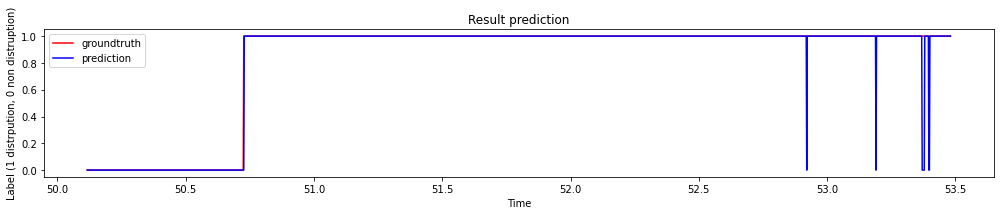

In [52]:
plot_result(shot, model, 0.0007)